In [20]:
%pylab inline

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import lda
from sklearn import qda
from sklearn import decomposition
from sklearn import linear_model
from sklearn import neural_network
from sklearn import preprocessing
from sklearn import cluster
from sklearn.pipeline import Pipeline

from sknn.backend import pylearn2
from sknn import mlp


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [21]:
n_samples = 100

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_samples=n_samples)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0, n_samples=n_samples),
            make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=n_samples),
            linearly_separable
            ]

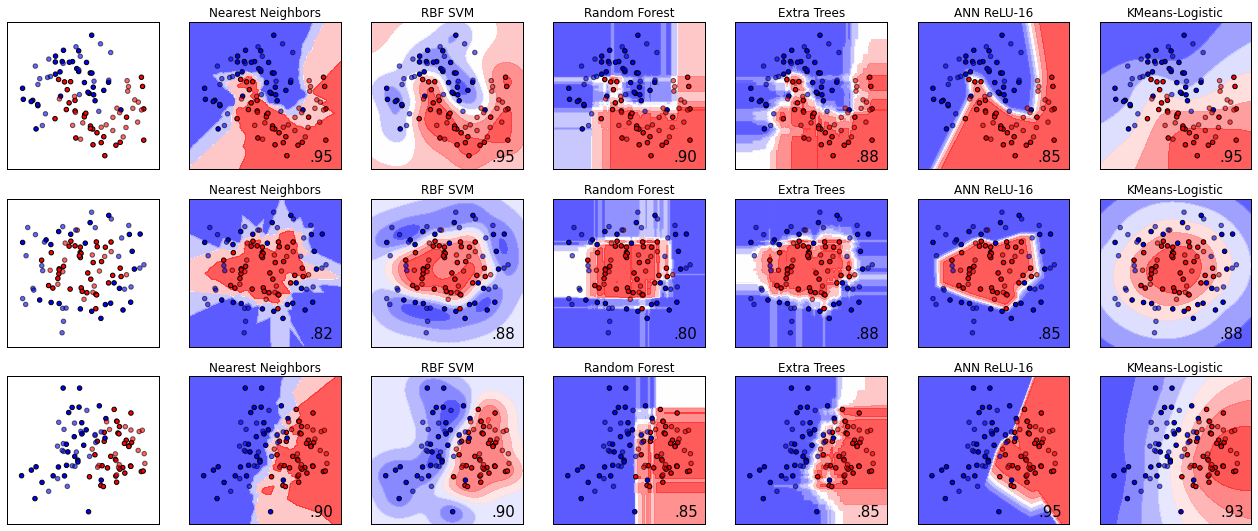

In [24]:
h = .02  # step size in the mesh

names = [
    "Nearest Neighbors", 
    #"Linear SVM", 
    "RBF SVM", 
    #"Decision Tree",
    "Random Forest", 
    "Extra Trees",
    #"RBM/Logistic"
    #"AdaBoost", 
    #"Naive Bayes", 
    #"LDA", 
    #"QDA", 
    "ANN ReLU-16", 
    "KMeans-Logistic"
]
classifiers = [
    neighbors.KNeighborsClassifier(3),
    #svm.SVC(kernel="linear", C=0.025),
    svm.SVC(gamma=2, C=1),
    #tree.DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(n_estimators=50),
    ensemble.ExtraTreesClassifier(n_estimators=50),
    #Pipeline(steps=[('scl', preprocessing.MinMaxScaler()), ('rbm', neural_network.BernoulliRBM()), ('logistic', linear_model.LogisticRegression())])

    #ensemble.AdaBoostClassifier(),
    #naive_bayes.GaussianNB(),
    #lda.LDA(),
    #qda.QDA(), 
    mlp.Classifier(
        layers=[mlp.Layer("Rectifier", units=16), mlp.Layer("Softmax")], 
        n_iter=300, n_stable=100, regularize=None,
        dropout_rate=None, learning_rule="sgd", learning_rate=0.01), 
    Pipeline([('kmeans', cluster.KMeans(n_clusters=20)), ('logistic', linear_model.LogisticRegression())])
]

fig_scale = 3
figure = plt.figure(figsize=(len(classifiers)*fig_scale, len(datasets)*fig_scale))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.bwr
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.75)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [25]:
pylab.savefig('../img/models.png')